#Luis Tadeo Becerra Rocha
##Simulación
###Practica 4
###Transformada inversa - Distribución Poisson Ejemplo 2

Número de clientes que llegaron en cada simulación (hora):
[2, 6, 6, 4, 2, 6, 3, 7, 4, 6, 7, 6, 5, 6, 5, 2, 8, 7, 6, 5, 6, 7, 5, 7, 6, 10, 6, 9, 8, 5, 6, 7, 3, 10, 4, 3, 5, 1, 3, 4, 8, 3, 3, 4, 3, 4, 5, 5, 4, 4, 1, 6, 2, 8, 5, 4, 3, 5, 6, 5, 4, 4, 9, 2, 10, 5, 5, 5, 3, 7, 4, 4, 5, 3, 4, 2, 3, 1, 9, 10, 6, 6, 3, 4, 2, 7, 6, 8, 2, 4, 4, 7, 3, 6, 0, 6, 5, 7, 3, 1]


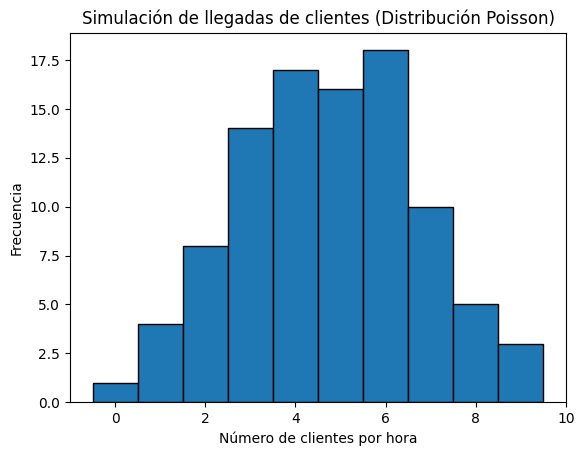

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parámetro de la distribución Poisson
lambda_poisson = 5  # Tasa promedio de llegadas por hora

# Generar un número aleatorio uniforme U ~ Uniform(0, 1)
num_simulaciones = 100  # Número de simulaciones (horas)
U = np.random.uniform(0, 1, num_simulaciones)

# Función de probabilidad de la distribución Poisson
def poisson_pmf(lambda_poisson, k):
    return (lambda_poisson ** k) * math.exp(-lambda_poisson) / math.factorial(k)

# Función para generar números aleatorios usando la transformada inversa para la Poisson
def poisson_inverse_transform(lambda_poisson, U):
    F_k = 0  # Inicializamos la FDA
    k = 0
    while True:
        F_k += poisson_pmf(lambda_poisson, k)  # Sumamos la probabilidad hasta que F(k) >= U
        if U <= F_k:
            return k  # Este valor de k es el número de llegadas
        k += 1

# Generar la cantidad de clientes que llegan en cada simulación (hora)
llegadas_simuladas = [poisson_inverse_transform(lambda_poisson, u) for u in U]

# Mostrar resultados
print("Número de clientes que llegaron en cada simulación (hora):")
print(llegadas_simuladas)

# Graficar los resultados
plt.hist(llegadas_simuladas, bins=np.arange(min(llegadas_simuladas), max(llegadas_simuladas) + 1) - 0.5, edgecolor='black')
plt.title("Simulación de llegadas de clientes (Distribución Poisson)")
plt.xlabel("Número de clientes por hora")
plt.ylabel("Frecuencia")
plt.show()